In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os

print(os.getpid())
%cd ../

24091
/media/work/docs/codes/c++/QSVT_framework/simulations


In [3]:
import pylib.measurement as mse
import pylib.mix as mix

writing the initial state of AA

-- Normalized extended initial vector --
        0.000000         1.000000 

-- Rotation angles --
az 3.302974e-01
ay 1.833819e+00


<IPython.core.display.Javascript object>


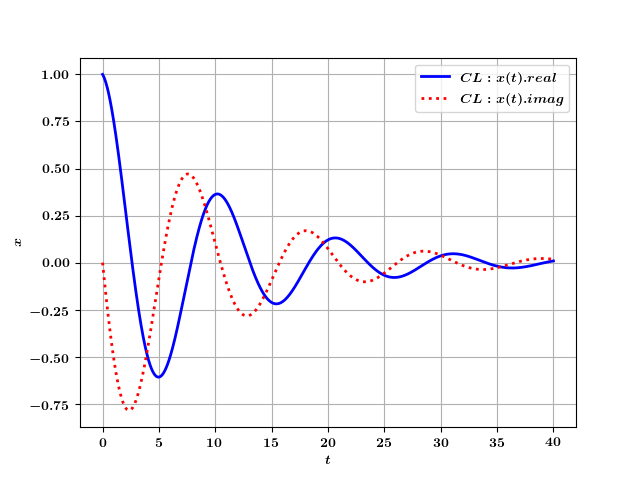

In [4]:
# ---------------------------------------------------------------------
# --- CLASSICAL: NONHERMITIAN HAMILTONIAN as a single complex value ---
# ---------------------------------------------------------------------
# d_t x = i * coef * x;
# Here, coef is a complex value are real values.
# ---
# psi = [x];
# H = coef;  -- non-hermitian
# ---
# d_t psi = i * H * psi;
# psi(t) = exp(i*t*H) * psi(0);
mix.reload_module(mix)

name_file_start = "AA"
path_root = "./tests/single-value-nonhermitian/"

nt    = 3001
t_end = 40
coef = 0.6 - 1j * 0.1 
# coef = 0.3
psi0  = [1]

t = np.linspace(0, t_end, nt)
dt = t[1] - t[0]
x = np.zeros(nt, dtype = np.complex)
x[0] = psi0[0]
for id_t in range(1, nt):
    x[id_t] = x[id_t-1] - dt * 1j * coef * x[id_t-1]
    
# *****************************************************
# *** INITIAL VECTOR, ROTATION ANGLES ***
# *****************************************************
# coef_norm = np.sqrt(np.sum(np.abs(psi0)**2))
# psi0_norm = psi0 / coef_norm
# mix.write_init_state(name_file_start, path_root, np.real(psi0_norm), np.imag(psi0_norm), 1)
# print("\n-- Normalized initial vector --")
# mix.print_array(psi0_norm, ff=[16, 6, "f"])

psi0_ext_norm = [0.0 ,1.0]
mix.write_init_state(name_file_start, path_root, np.real(psi0_ext_norm), np.imag(psi0_ext_norm), 1)

print("\n-- Normalized extended initial vector --")
mix.print_array(psi0_ext_norm, ff=[16, 6, "f"])

print("\n-- Rotation angles --")
angle_z, angle_y = mix.get_Rc_angles(coef)
print("az {:0.6e}".format(angle_z))
print("ay {:0.6e}".format(angle_y))

    
# *****************************************************
# *** PLOTTING ***
# *****************************************************
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t, np.real(x[:]), 
    color='b', 
#     marker="o", 
    linewidth = 2, linestyle='-', 
    label = "$CL: x(t).real$"
)
ax.plot(
    t, np.imag(x[:]), 
    color='r',  
    linewidth = 2, linestyle=':', 
    label = "$CL: x(t).imag$"
)
plt.xlabel('$t$'); plt.ylabel("$x$"); ax.legend(); plt.grid(True); plt.show();
# plt.savefig(path_fig + label_y + '-real.png')


--- Reading the file ./tests/single-value-nonhermitian//AA_OUTPUT.hdf5...
Simulation has been performed  04-26-2022 14:23:41

QSP time step: 0.500
QSP normalization: 1.000e+00
real time step: 5.000e-01
last real time moment: 40.000

--- Reading the file ./tests/single-value-nonhermitian//AA_OUTPUT.hdf5...
Registers: 
{'qb': 2, 'a': 1, 'c': 1, 'r': 1}

Find amplitudes of the following state: 
|00>|0>|0>|0>


<IPython.core.display.Javascript object>


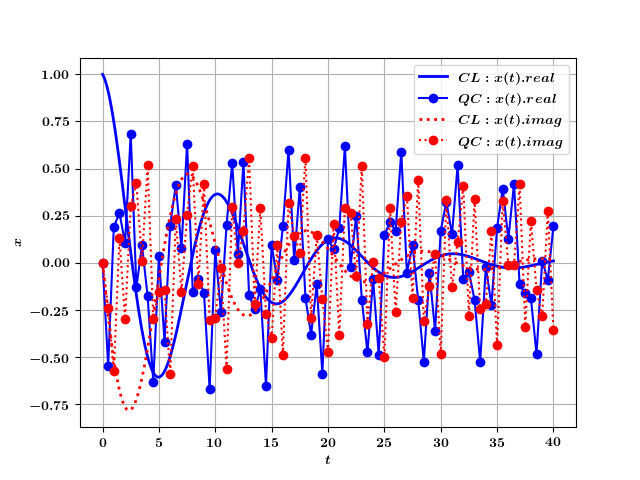

In [12]:
# *****************************************************
# *** COMPARISON ***
# *****************************************************
mix.reload_module(mix)
mix.reload_module(mse)

dd = mse.open_all({"path": path_root,"pname": "AA"})
t_qsp = dd["t"]
print()
print("QSP time step: {:0.3f}".format(dd["qsp"]["dt"]))
print("QSP normalization: {:0.3e}".format(dd["qsp"]["norm"]))
print("real time step: {:0.3e}".format(dd["qsp"]["dt"] * dd["qsp"]["norm"]))
print("last real time moment: {:0.3f}".format(t_qsp[-1]))
mse.read_all_output_states(dd)
x_qsp, _ = mse.get_state_on_t(dd, {"r": 0})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,     np.real(x[:]),     color='b', linewidth = 2, linestyle='-', label = "$CL: x(t).real$")
ax.plot(t_qsp, np.real(x_qsp[:]), color='b', marker="o",  linestyle='-', label = "$QC: x(t).real$")
ax.plot(t,     np.imag(x[:]),     color='r',  linewidth = 2, linestyle=':', label = "$CL: x(t).imag$")
ax.plot(t_qsp, np.imag(x_qsp[:]), color='r',  marker="o", linestyle=':', label = "$QC: x(t).imag$")
plt.xlabel('$t$'); plt.ylabel("$x$"); ax.legend(); plt.grid(True); plt.show();


--- Reading the file ./tests/single-value-nonhermitian//AA_OUTPUT.hdf5...
Simulation has been performed  04-26-2022 14:20:13

QSP time step: 0.500
QSP normalization: 1.000e+00
real time step: 5.000e-01
last real time moment: 40.000

--- Reading the file ./tests/single-value-nonhermitian//AA_OUTPUT.hdf5...
Registers: 
{'qb': 2, 'a': 1, 'c': 1, 'r': 1}

Find amplitudes of the following state: 
|00>|0>|0>|0>
Registers: 
{'qb': 2, 'a': 1, 'c': 1, 'r': 1}

Find amplitudes of the following state: 
|00>|0>|0>|1>


<IPython.core.display.Javascript object>


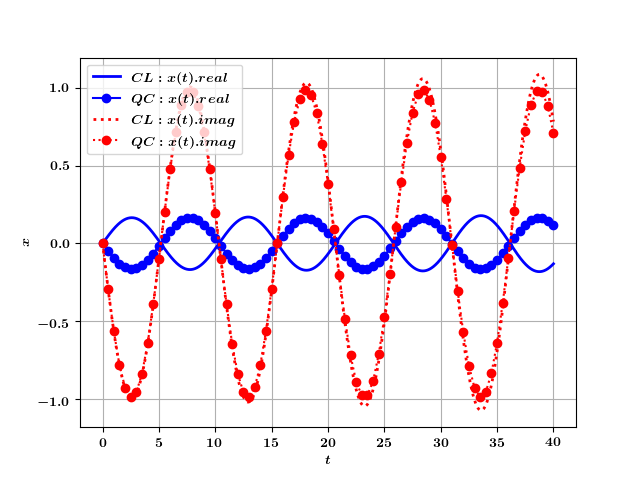

In [5]:
# ---------------------------------------------------------------------
# --- HERMITIAN HAMILTONIAN ---
# ---------------------------------------------------------------------
# d_t x = i * coef    * y;
# d_t y = i * coef_cc * x;
# ---
# psi = [x, y];
# H = |      0, coef|
#     |coef_cc,  0.0|
mix.reload_module(mix)
mix.reload_module(mse)



name_file_start = "AA"
path_root = "./tests/single-value-nonhermitian/"

nt    = 3001
t_end = 40
coef = 0.6 + 1j * 0.1 
coef_cc = np.conj(coef)
psi0  = [0, 1]

t = np.linspace(0, t_end, nt)
dt = t[1] - t[0]
x = np.zeros(nt, dtype = np.complex)
y = np.zeros(nt, dtype = np.complex)
x[0] = psi0[0]
y[0] = psi0[1]
for id_t in range(1, nt):
    x[id_t] = x[id_t-1] - dt * 1j * coef    * y[id_t-1]
    y[id_t] = y[id_t-1] - dt * 1j * coef_cc * x[id_t-1]
    
    
    
    
    
# *****************************************************
# *** Read from the framework ***
# *****************************************************   
dd = mse.open_all({"path": path_root,"pname": "AA"})
t_qsp = dd["t"]
print()
print("QSP time step: {:0.3f}".format(dd["qsp"]["dt"]))
print("QSP normalization: {:0.3e}".format(dd["qsp"]["norm"]))
print("real time step: {:0.3e}".format(dd["qsp"]["dt"] * dd["qsp"]["norm"]))
print("last real time moment: {:0.3f}".format(t_qsp[-1]))
mse.read_all_output_states(dd)
x_qsp, _ = mse.get_state_on_t(dd, {"r": 0})
y_qsp, _ = mse.get_state_on_t(dd, {"r": 1})
    
# *****************************************************
# *** PLOTTING ***
# *****************************************************
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t,     np.real(x[:]),     color='b', linewidth = 2, linestyle='-', label = "$CL: x(t).real$")
ax.plot(t_qsp, np.real(x_qsp[:]), color='b', marker="o",  linestyle='-', label = "$QC: x(t).real$")
ax.plot(t,     np.imag(x[:]),     color='r',  linewidth = 2, linestyle=':', label = "$CL: x(t).imag$")
ax.plot(t_qsp, np.imag(x_qsp[:]), color='r',  marker="o", linestyle=':', label = "$QC: x(t).imag$")
plt.xlabel('$t$'); plt.ylabel("$x$"); ax.legend(); plt.grid(True); plt.show();

del x, y, t, dt, coef, coef_cc, nt, t_end, psi0, name_file_start, path_root

In [37]:
dd["states"][1]

{'state': array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1]], dtype=int16),
 'ampls': array([(-0.154, -9.251e-01), ( 0.347,  9.216e-17)],
       dtype=[('real', '<f8'), ('imag', '<f8')])}

In [43]:
np.real(x_qsp[0])

array([ 0.   , -0.154, -0.107,  0.08 ,  0.162,  0.033, -0.14 , -0.13 ,
        0.05 ,  0.164,  0.064, -0.12 , -0.147,  0.018,  0.159,  0.093,
       -0.095, -0.159, -0.015,  0.148,  0.118])